In [1]:
import colorcet as cc
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize, stats

In [2]:
import sys
sys.path.append('../src')
import dynamics as dn
import hypercube as hc
import networks as ns

In [3]:
label_fontsize = 10

# Fig. S1

In [4]:
def color_indicator(ax, Ndim, lower_left_x=0.55, lower_left_y=-0.24, boxwidth=0.05, fontsize=6):
    axins = ax.inset_axes([lower_left_x, lower_left_y, boxwidth*Ndim, boxwidth*10], transform=ax.transAxes)
    ax = axins
    ax.pcolormesh([np.arange(Ndim)], cmap=plt.cm.tab10, vmin=0, vmax=9)
    for i in range(Ndim):
        ax.text(
            i + 0.5, 0.5, i + 1, c="w", ha="center", va="center", weight="bold", fontsize=fontsize,  # "$b_" + f"{i+1}$",
        )
    ax.set_aspect("equal")
    ax.axis("off")

/home/yoshi/hypercube_paper_part1_figures/notebooks/../src/hypercube.py:257: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cbar = ax.scatter(


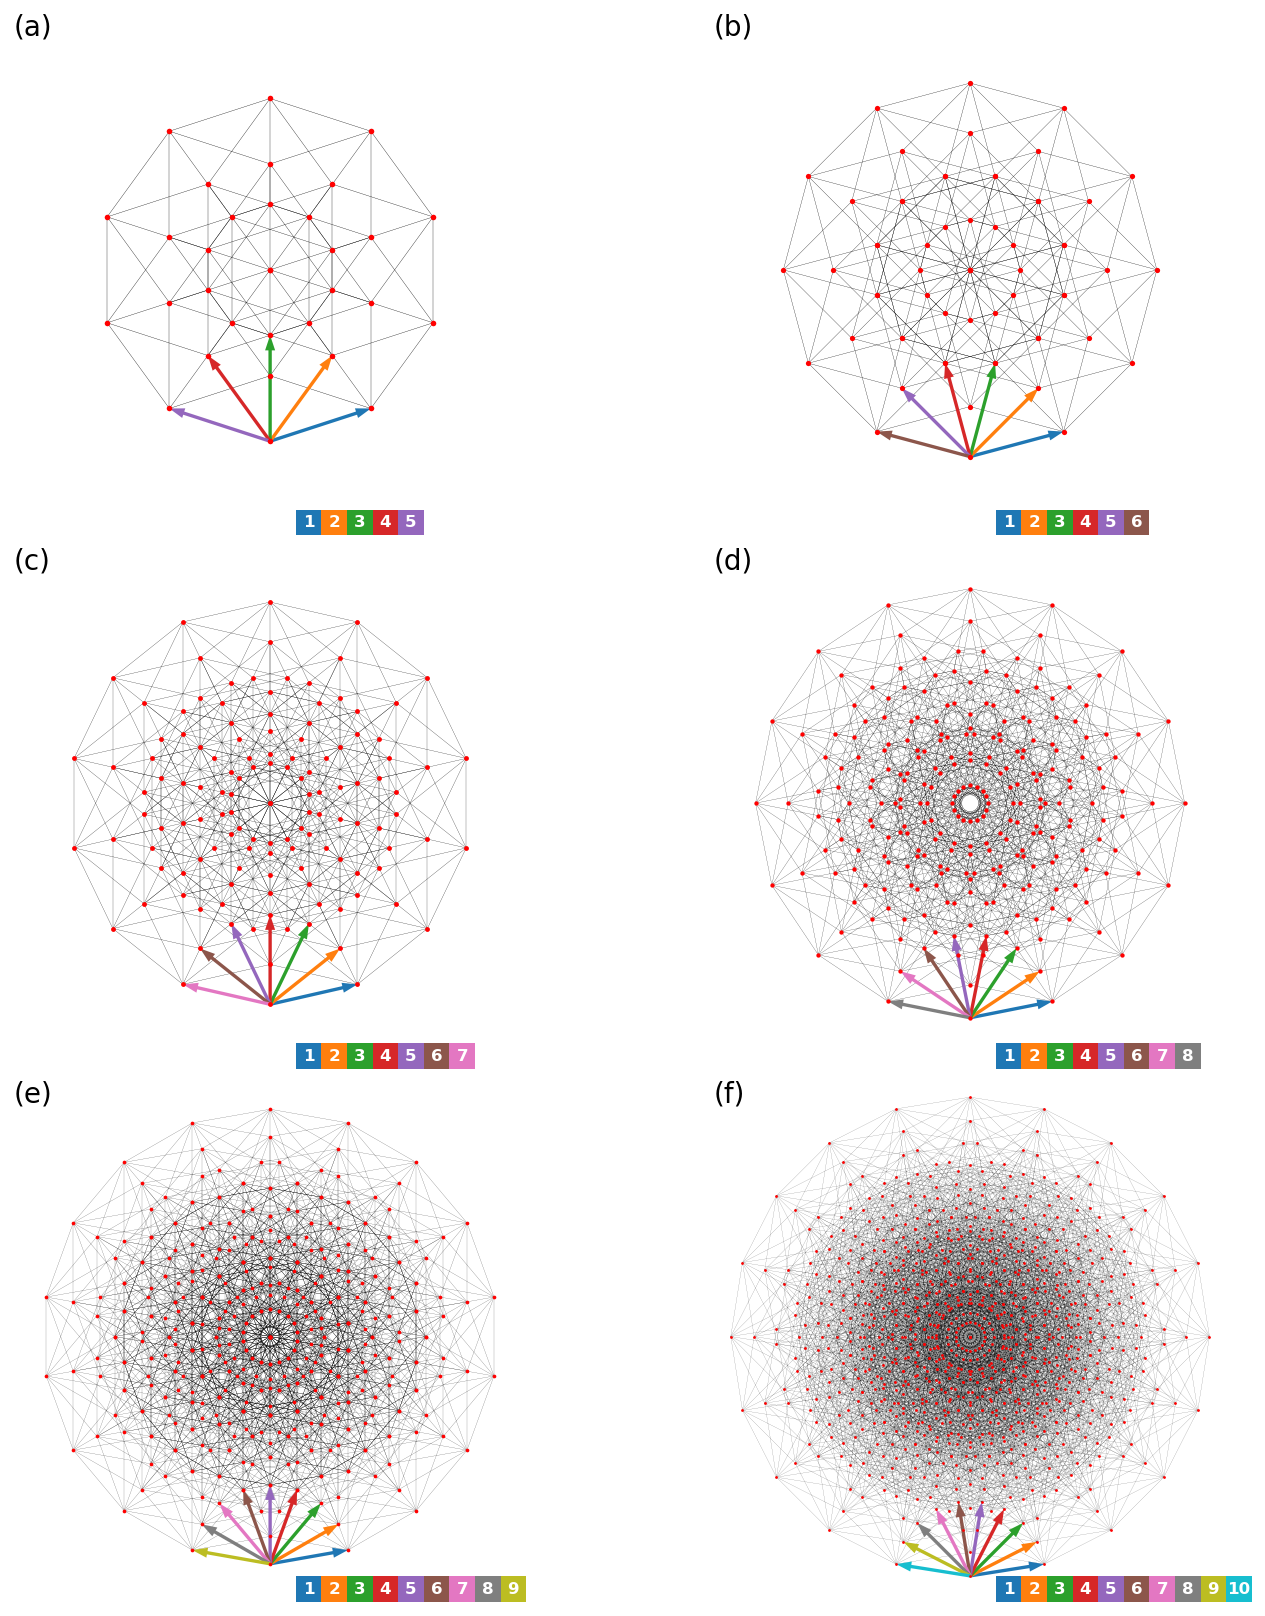

In [5]:
label_pos = [0, 1]
fig, axs = plt.subplots(3, 2, figsize=(7, 8), sharex=True, sharey=True)

style = "isometric"
for i, label in enumerate(['a', 'b', 'c', 'd', 'e', 'f']):
    Ndim = i + 5
    ax = axs[i//2, i%2]
    fig, ax = hc.project_hypercube(Ndim, style, plot_basis=True, plot_label=False, s=20 - 0.16*(Ndim)**2, lw=0.2 - Ndim*0.016, fig=fig, ax=ax, )
    ax.text(*label_pos, "(" + label + ")", transform=ax.transAxes, fontsize=label_fontsize, ha="left", va="top")
    color_indicator(ax, Ndim)
    ax.set_aspect('equal')

fig.savefig("../figures/fig-s1.svg")
fig.savefig("../figures/fig-s1.pdf")

# Fig. S2

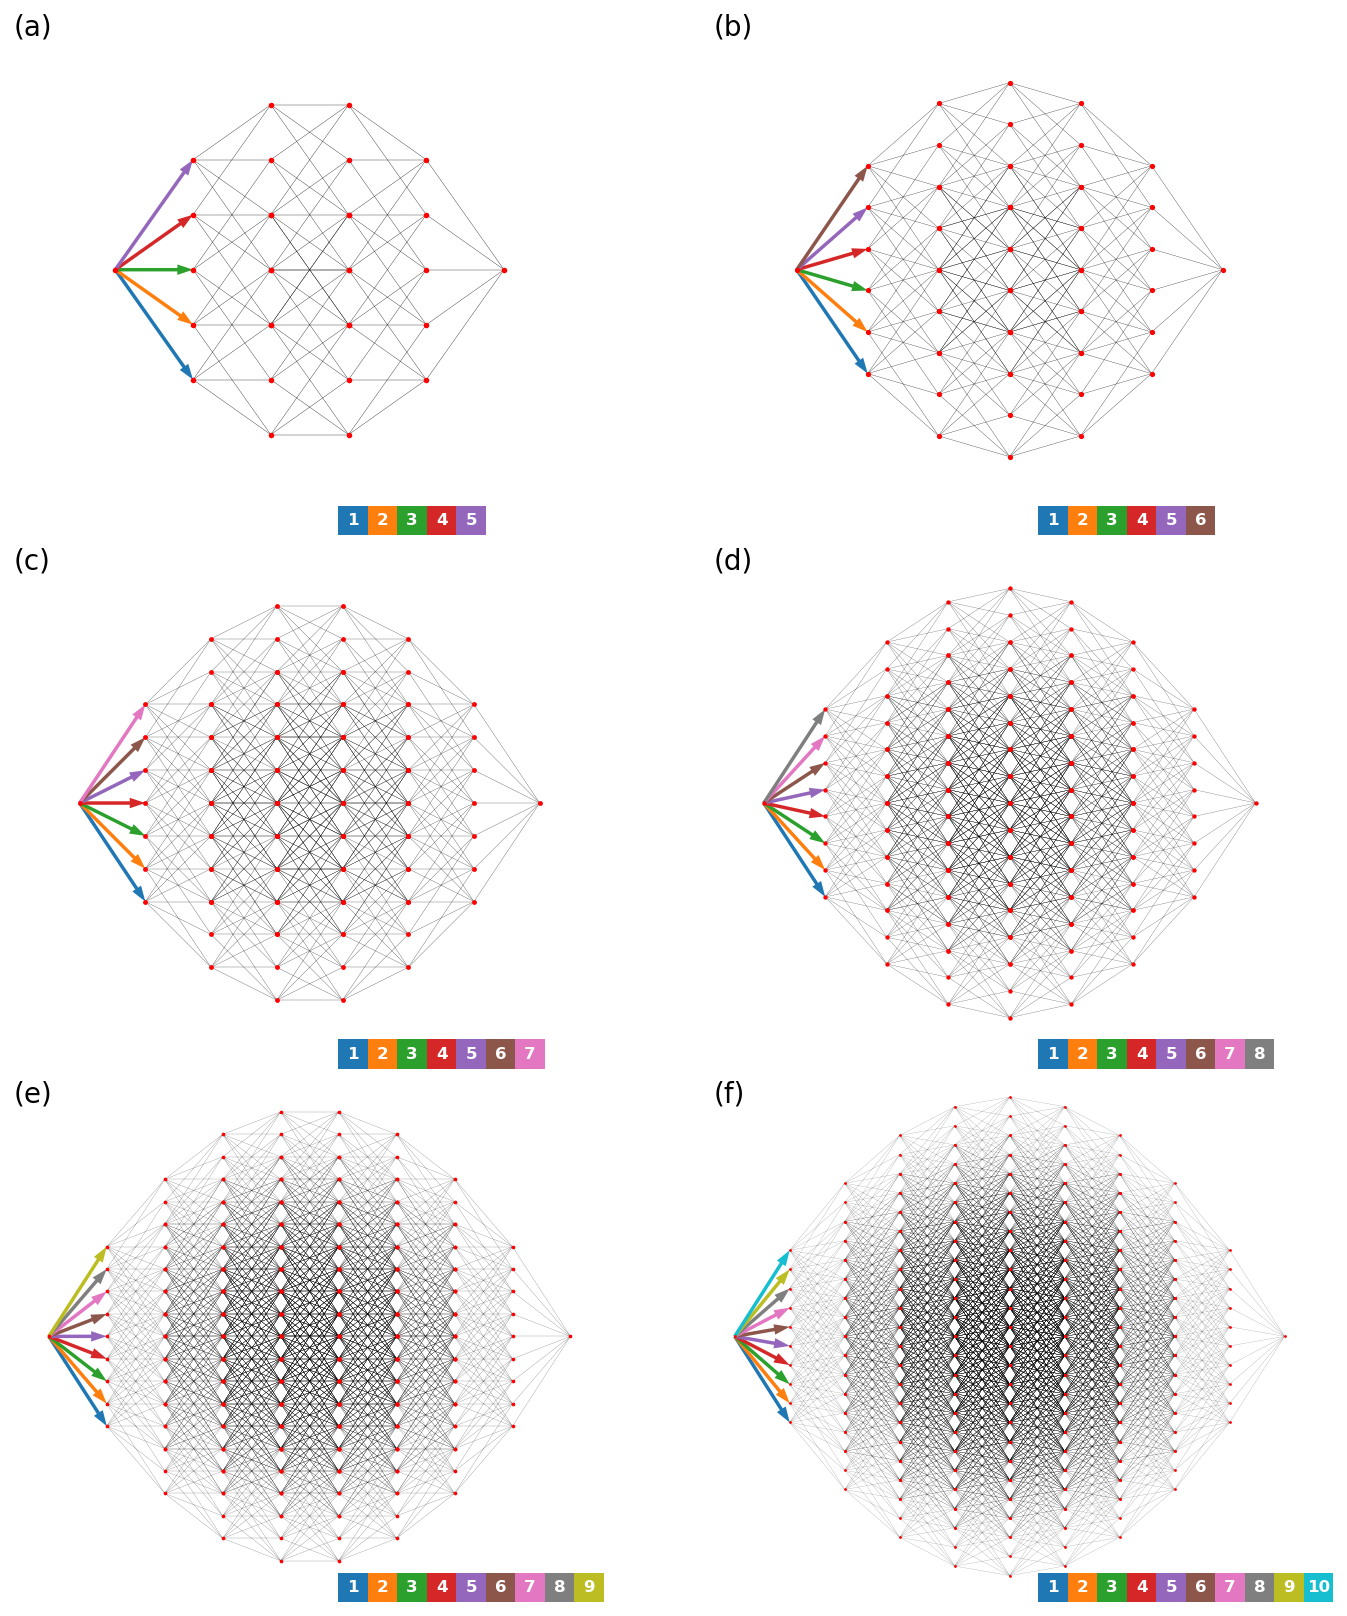

In [6]:
label_pos = [0, 1]
fig, axs = plt.subplots(3, 2, figsize=(7, 8), sharex=True, sharey=True)

style = "hamming"
for i, label in enumerate(['a', 'b', 'c', 'd', 'e', 'f']):
    Ndim = i + 5
    ax = axs[i//2, i%2]
    fig, ax = hc.project_hypercube(Ndim, style, plot_basis=True, plot_label=False, s=20 - 0.16*(Ndim)**2, lw=0.2 - Ndim*0.016, fig=fig, ax=ax, )
    ax.text(*label_pos, "(" + label + ")", transform=ax.transAxes, fontsize=label_fontsize, ha="left", va="top")
    color_indicator(ax, Ndim)
    ax.set_aspect('equal')

fig.savefig("../figures/fig-s2.svg")
fig.savefig("../figures/fig-s2.pdf")

# Fig. S3

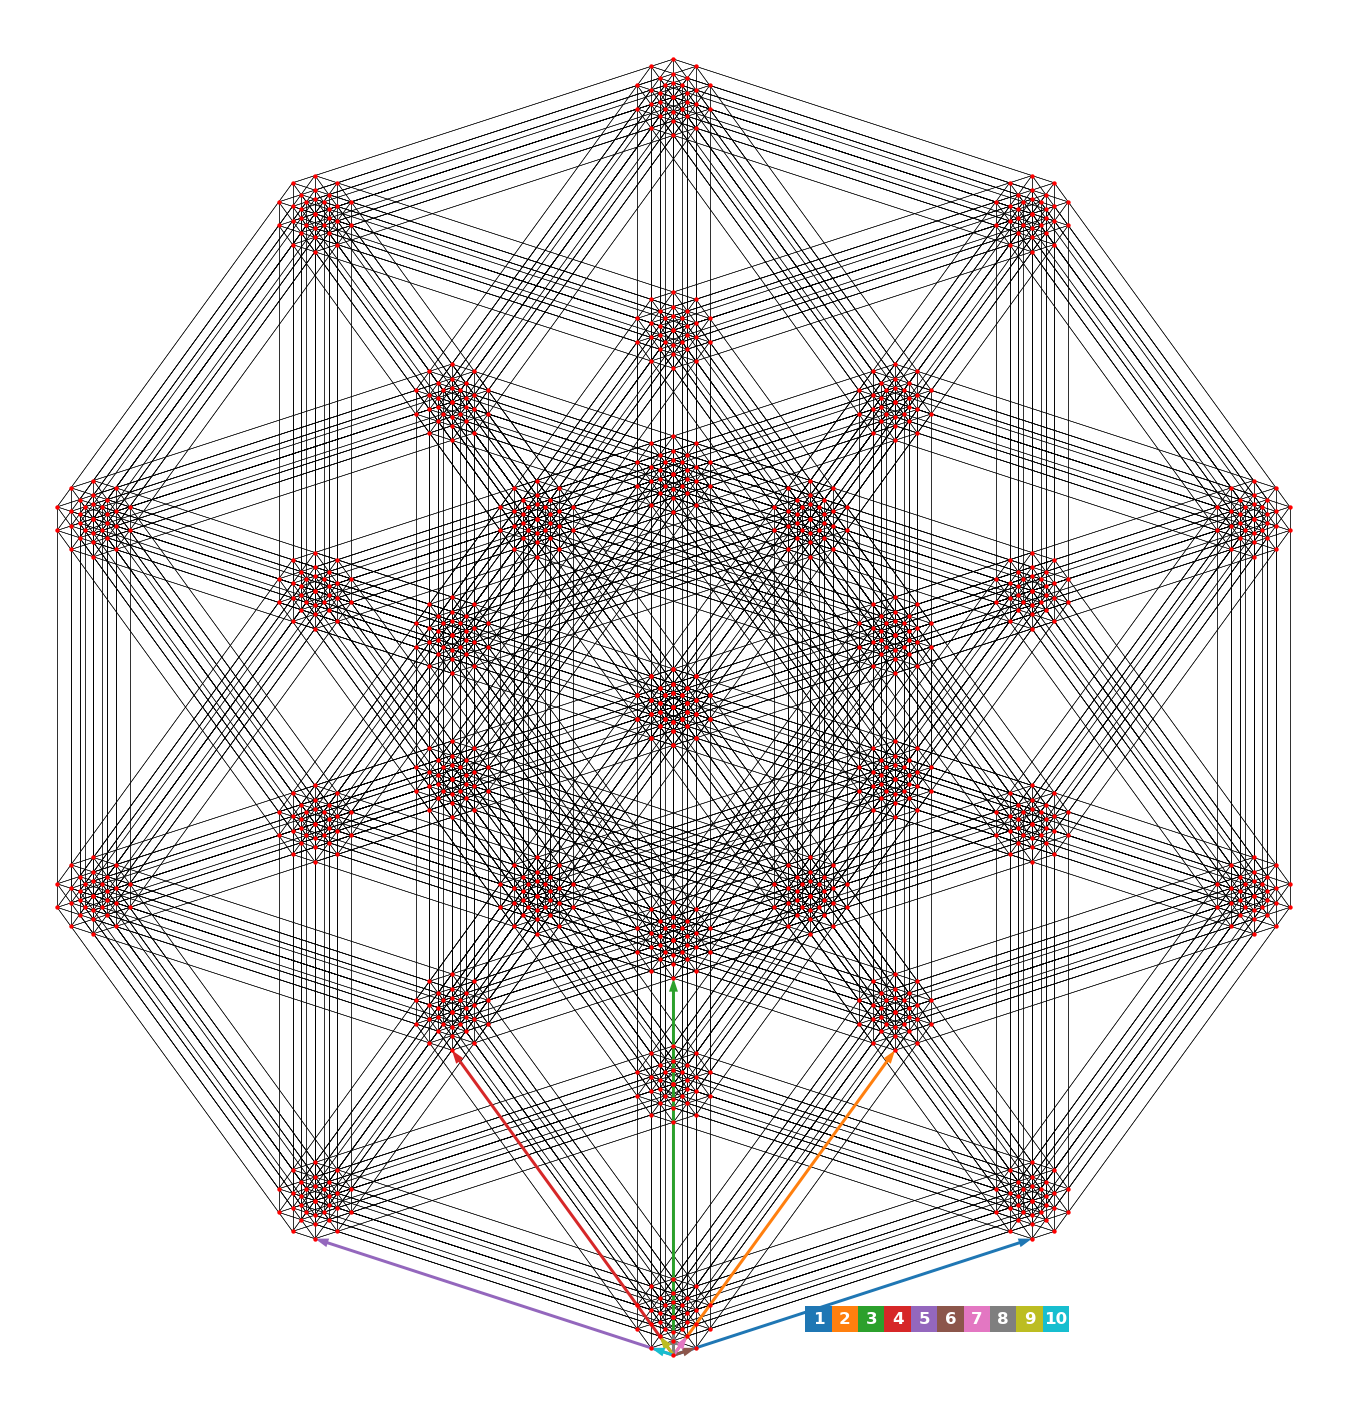

In [7]:
fig, ax = plt.subplots(figsize=(7, 7))

style = "fractal"
Ndim = 10
fig, ax = hc.project_hypercube(Ndim, style, plot_basis=True, plot_label=False, s=10, lw=0.2, fractal_repeat=2, fractal_length_ratio=16, basis_width=0.01, fig=fig, ax=ax, )
color_indicator(ax, Ndim, lower_left_x=0.6, lower_left_y=-0.04, boxwidth=0.02)
ax.set_aspect('equal')

fig.savefig("../figures/fig-s3.svg")
fig.savefig("../figures/fig-s3.pdf")

In [8]:
#def approximate_probability(probability, num_samples, rng):
#    num_states = len(probability)
#    choices = rng.choice(num_states, size=num_samples, p=probability)
#    sample_probability = np.bincount(choices, minlength=num_states)
#    sample_probability = sample_probability / np.sum(sample_probability)
#    return sample_probability

# Fig. S4

In [9]:
def plot_pca_hamming(Ndim, fig, ax1, ax2, ax3, ax4, ax5, hamming=False, seed=None):
    style = "wpca"
    if hamming:
        w = 2.0
        weights = np.ones(2**Ndim)
        weights[0b0000] = w
        weights[0b1111] = w
        symmetric_weights=True
    else:
        if seed is None:
            seed = 42
        rng = np.random.default_rng(seed)
        weights = rng.uniform(size=2**Ndim)
        symmetric_weights=False
    weights /= weights.sum()
    ax = ax1
    fig, ax, pca = hc.project_hypercube(
        Ndim,
        style,
        plot_label=False,
        plot_basis=True,
        s=weights**2*10000,
        lw=0.2,
        weights=weights,
        symmetric_weights=symmetric_weights,
        return_pca=True,
        fig=fig,
        ax=ax
    )
    color_indicator(ax, Ndim, lower_left_x=0.7, lower_left_y=-0.2, fontsize=7)

    ax = ax2
    eigenvalues = pca.explained_variance_ratio_
    ax.scatter(np.arange(len(eigenvalues)) + 1, eigenvalues, c='k')
    ax.set_xlabel("PC$i$")
    ax.set_ylabel("Fraction of\nexplained variance $\\tilde{\\lambda}_i$")
    ax.set_xticks(np.arange(len(eigenvalues)) + 1)
    ax.set_xlim(0.75, 4.25)
    ax.set_ylim(0.0, np.max(eigenvalues)*1.1)

    ax = ax3
    eigenvectors = pca.components_[0]
    bars = ax.bar(np.arange(len(eigenvalues)) + 1, eigenvectors)
    for i, bar in enumerate(bars):
        bar.set_facecolor(f"C{i}")
    ax.set_xlabel("Variable")
    ax.set_ylabel("PC1 loading")
    ax.axhline(0, c="k", ls="--", lw=0.56,)# zorder=0)
    ax.set_xticks(np.arange(len(eigenvalues)) + 1)
    ax = ax4
    eigenvectors = pca.components_[1]
    bars = ax.bar(np.arange(len(eigenvalues)) + 1, eigenvectors)
    for i, bar in enumerate(bars):
        bar.set_facecolor(f"C{i}")
    ax.set_xlabel("Variable")
    ax.set_ylabel("PC2 loading")
    ax.axhline(0, c="k", ls="--", lw=0.56,)# zorder=0)
    ax.set_xticks(np.arange(len(eigenvalues)) + 1)

    ax = ax5
    fig, ax = hc.project_hypercube(
        Ndim,
        style,
        plot_label=False,
        plot_basis=False,
        #basis_width=0.02,
        s=0,
        lw=0.2,
        weights=weights,
        symmetric_weights=symmetric_weights,
        plot_hamiltonian_path=True,
        fig=fig,
        ax=ax,
    )
    return fig

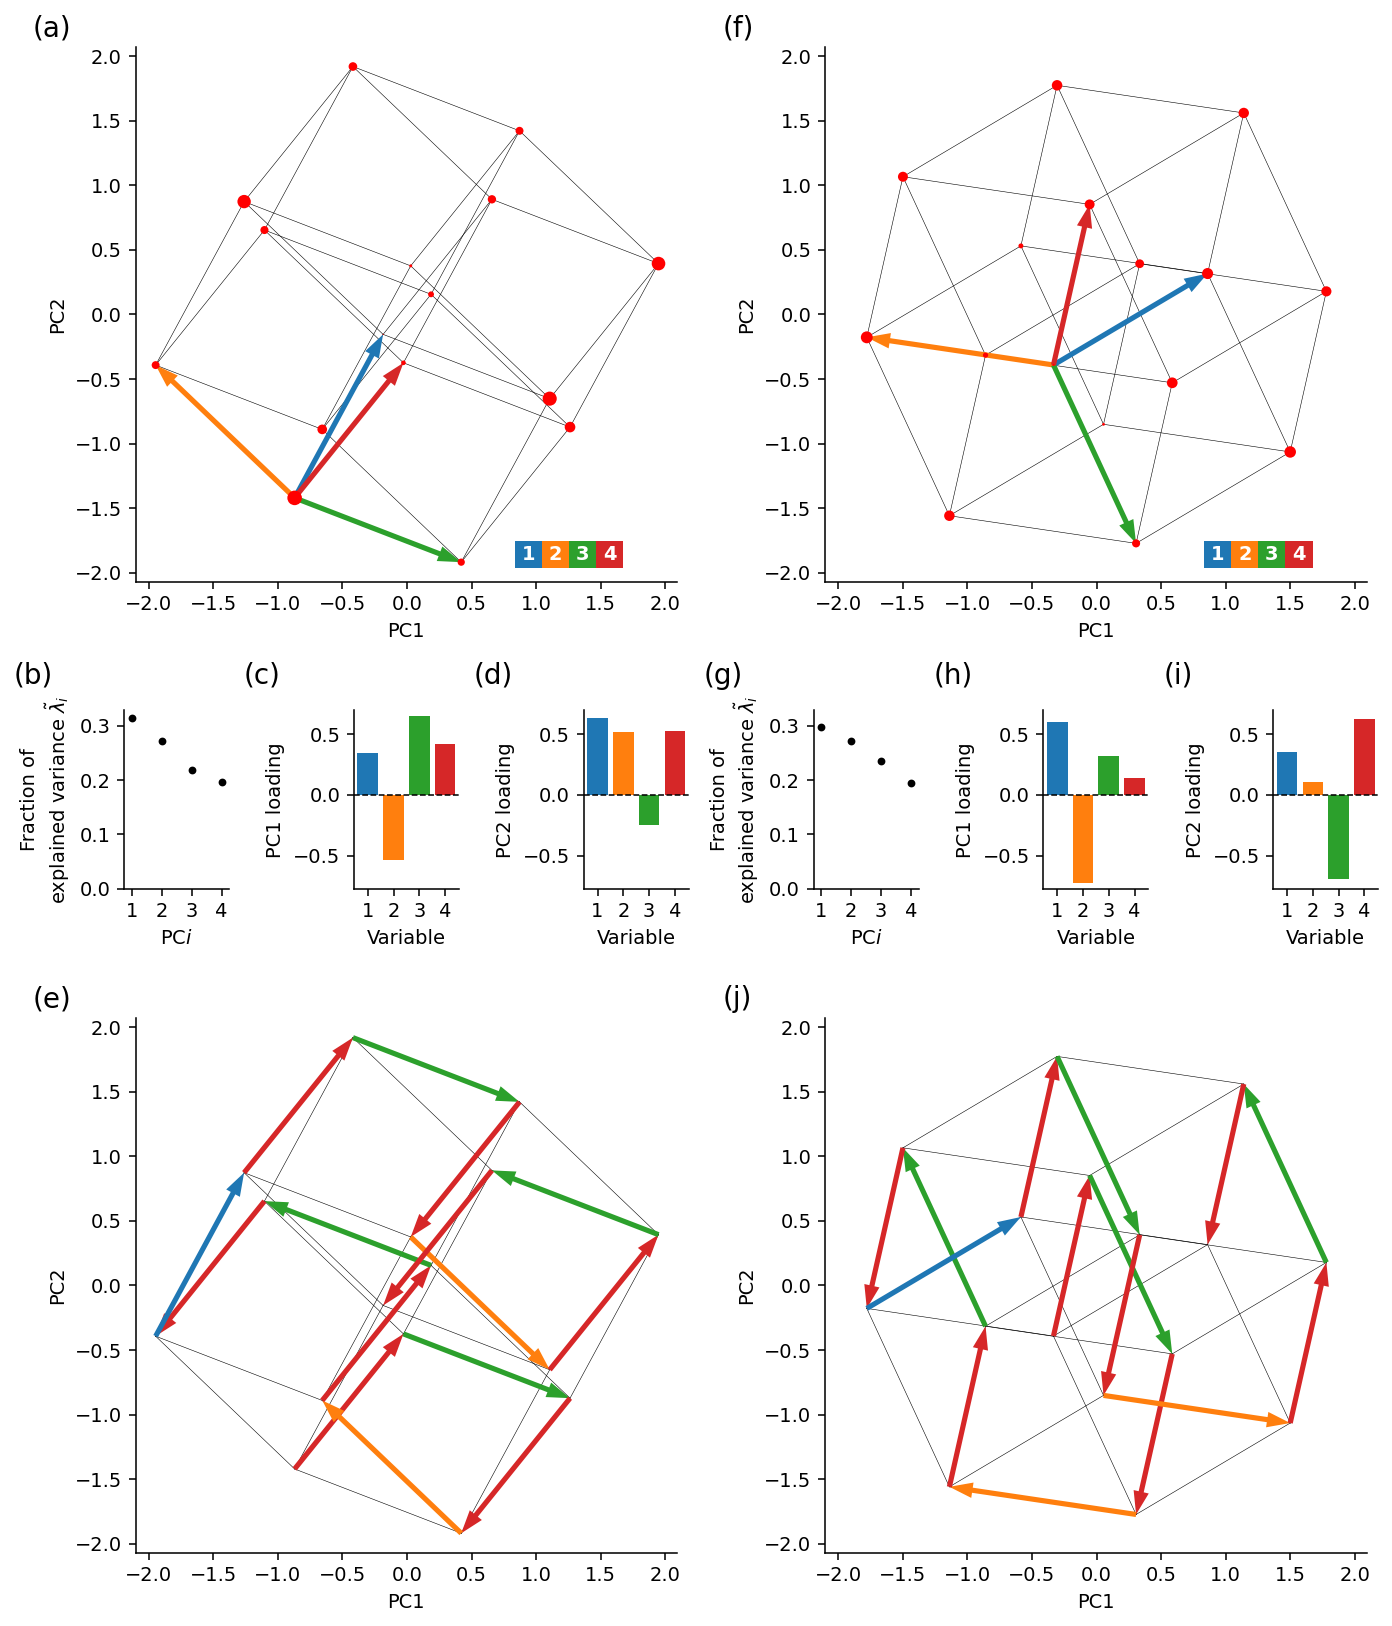

In [10]:
fig = plt.figure(figsize=(7, 8.2), layout="tight")
gs = fig.add_gridspec(3, 6, height_ratios=(3, 1, 3),)
ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2], sharey=ax3)
ax5 = fig.add_subplot(gs[2, :3], sharex=ax1, sharey=ax1)

ax6 = fig.add_subplot(gs[0, 3:], sharex=ax1, sharey=ax1)
ax7 = fig.add_subplot(gs[1, 3], sharey=ax2)
ax8 = fig.add_subplot(gs[1, 4], sharey=ax3)
ax9 = fig.add_subplot(gs[1, 5], sharey=ax8)
ax10 = fig.add_subplot(gs[2, 3:], sharex=ax1, sharey=ax1)

Ndim = 4
plot_pca_hamming(4, fig, ax1, ax2, ax3, ax4, ax5, seed=137)
ax = ax1
ax.text(-0.19, 1.02, "(a)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax2
ax.text(-1.05, 1.15, "(b)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax3
ax.text(-1.05, 1.15, "(c)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax4
ax.text(-1.05, 1.15, "(d)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax5
ax.text(-0.19, 1.02, "(e)", fontsize=label_fontsize, transform=ax.transAxes)

plot_pca_hamming(4, fig, ax6, ax7, ax8, ax9, ax10, seed=273)
ax = ax6
ax.text(-0.19, 1.02, "(f)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax7
ax.text(-1.05, 1.15, "(g)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax8
ax.text(-1.05, 1.15, "(h)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax9
ax.text(-1.05, 1.15, "(i)", fontsize=label_fontsize, transform=ax.transAxes)
ax = ax10
ax.text(-0.19, 1.02, "(j)", fontsize=label_fontsize, transform=ax.transAxes)

fig.savefig("../figures/fig-s4.svg")
fig.savefig("../figures/fig-s4.pdf")

# Fig. S5

In [11]:
def plot_pca_and_biplot(fig, axs, xcomponent=0, ycomponent=1,
                        flip_xbasis=False, flip_ybasis=False,
                       panel_label=["a", "b", "c", "d"]):
    T = 0.3
    thresholds = [1e-7, 1e-6, 1e-6]

    counter = 0
    im, coord, arrow = ns.Farhan2013(2)

    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    Ndim = len(im)
    style = 'wpca'

    # landscape with captions
    ax = axs[counter]
    counter += 1
    fig, ax, pca = hc.project_hypercube(
        Ndim,
        style,
        xcomponent=xcomponent,
        ycomponent=ycomponent,
        plot_label=False,
        plot_basis=False,
        return_pca=True,
        s=20,
        marker_lw=0.1,
        lw=0.1,
        basis_width=0.02,
        flip_xbasis=flip_xbasis,
        flip_ybasis=flip_ybasis,
        weights=probability,
        weights_threshold=thresholds[2],
        vertex_colors=energy,
        fig=fig,
        ax=ax,
        vertex_cmap=plt.cm.bwr,
    )

    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis:
        basis[:, 1] = -basis[:, 1]
    small_pc = np.argwhere(np.bitwise_and(np.abs(basis[:, 0])<1e-3, np.abs(basis[:, 1])<1e-3))
    basis_for_plot = basis.copy()
    basis_for_plot[small_pc] = [0.0, 0.0]
    hc.draw_basis([3, 3], 2*basis_for_plot, ax, 0.04, cc.cm.rainbow4, True, False,)

    ax.set_ylabel(f"PC{ycomponent+1}")
    ax.text(-0.16, 1.04, "(" + panel_label[counter-1] + ")",
            fontsize=label_fontsize,
            transform=ax.transAxes)

    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    norm_angles[small_pc] = 0
    # PC1 loadings
    ax = axs[counter]
    counter += 1
    bars = ax.bar(np.arange(len(basis)) + 1, basis[:, 0])
    for i, bar in enumerate(bars):
        bar.set_facecolor(cc.cm.rainbow4(norm_angles[i]))
    ax.axhline(0, c='k', ls='--', lw=0.5, )#zorder=0)
    ax.text(-0.16, 1.1, "(" + panel_label[counter-1] + ")",
            fontsize=label_fontsize,
            transform=ax.transAxes)
    ax.set_xticks(np.arange(len(basis)) + 1)
    ax.set_xlabel("Variable")
    ax.set_ylabel(f"PC{xcomponent+1} loading")
    # PC2 loadings
    ax = axs[counter]
    counter += 1
    bars = ax.bar(np.arange(len(basis)) + 1, basis[:, 1])
    for i, bar in enumerate(bars):
        bar.set_facecolor(cc.cm.rainbow4(norm_angles[i]))
    ax.axhline(0, c='k', ls='--', lw=0.5,)# zorder=0)
    ax.text(-0.16, 1.1, "(" + panel_label[counter-1] + ")",
            fontsize=label_fontsize,
            transform=ax.transAxes)
    ax.set_xticks(np.arange(len(basis)) + 1)
    ax.set_xlabel("Variable")
    ax.set_ylabel(f"PC{ycomponent+1} loading")
    # network
    ax = axs[counter]
    counter += 1
    ax = ns.plot_kagome_network(im, 1.2*coord, ax=ax, node_size=80, node_color=norm_angles, labels='auto', font_size=7, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.12, 1.04, "(" + panel_label[counter-1] + ")",
            fontsize=label_fontsize,
            transform=ax.transAxes)
    ax.set_ylim(-3, 3)
    return fig, axs

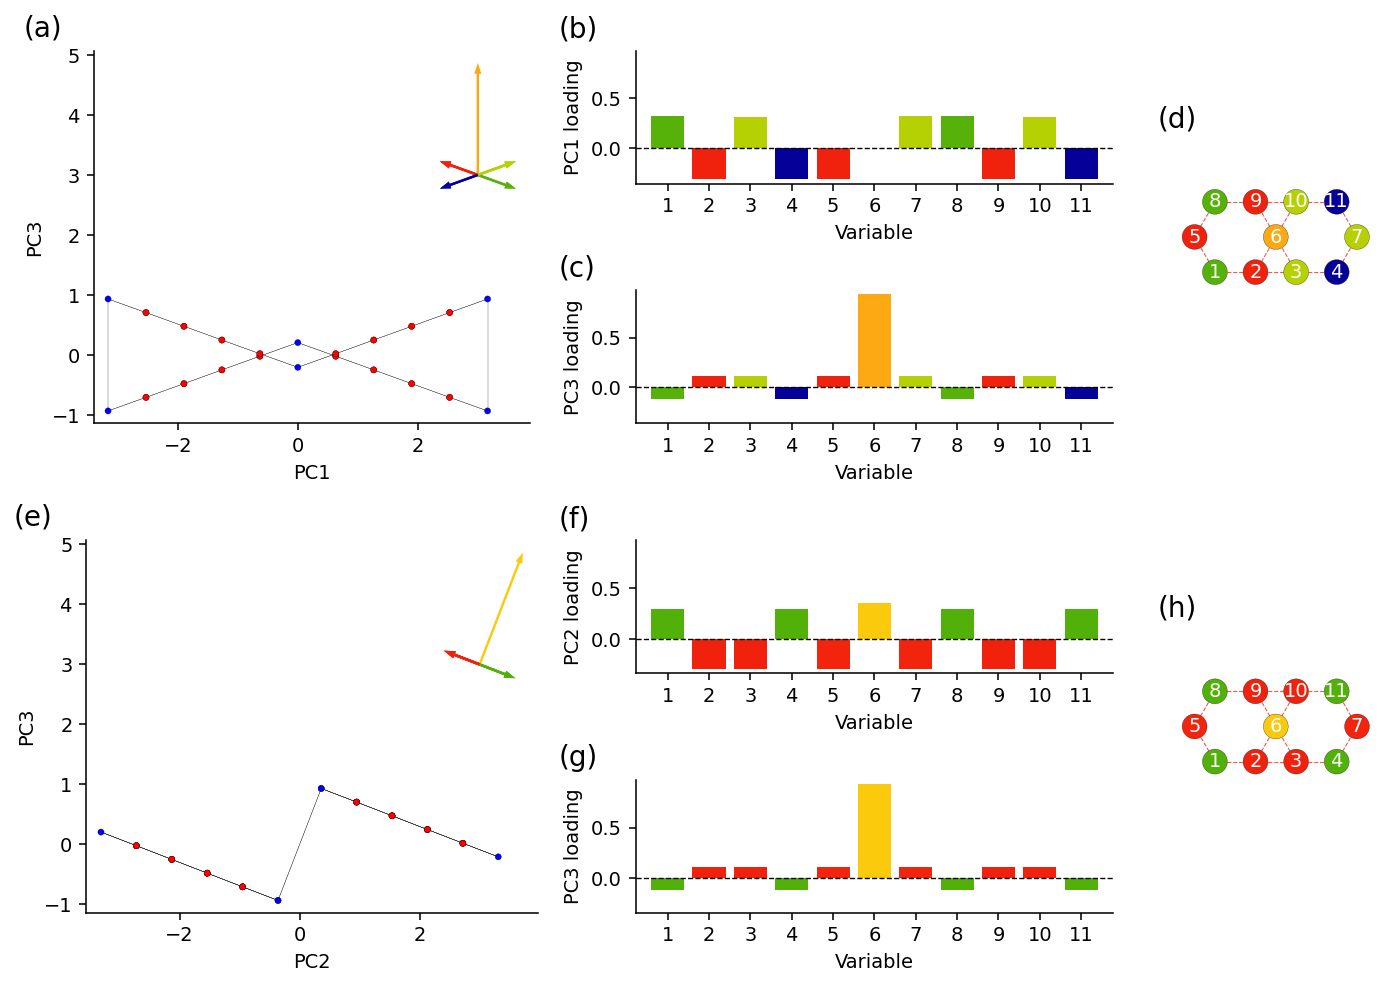

In [12]:
fig = plt.figure(figsize=(7, 7.5/3*2), layout='tight')
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1.25])
gs1 = gs[0, 1].subgridspec(2, 2, hspace=0.8, wspace=0.2, width_ratios=[2.5, 1])
gs2 = gs[1, 1].subgridspec(2, 2, hspace=0.8, wspace=0.2, width_ratios=[2.5, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs1[0, 0])
ax3 = fig.add_subplot(gs1[1, 0], sharex=ax2, sharey=ax2)
ax4 = fig.add_subplot(gs1[:2, 1])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs2[0, 0])
ax7 = fig.add_subplot(gs2[1, 0], sharex=ax6, sharey=ax6)
ax8 = fig.add_subplot(gs2[:2, 1], sharex=ax4, sharey=ax4)
axs_top = [ax1, ax2, ax3, ax4]
axs_bottom= [ax5, ax6, ax7, ax8]

xcomponent = 0
ycomponent = 2
fig, axs_top = plot_pca_and_biplot(fig, axs_top, xcomponent, ycomponent,)
xcomponent = 1
ycomponent = 2
fig, axs_bottom = plot_pca_and_biplot(fig, axs_bottom, xcomponent, ycomponent, flip_xbasis=True,
                                     panel_label=["e", "f", "g", "h"])
fig.savefig("../figures/fig-s5.svg", dpi=600)
fig.savefig("../figures/fig-s5.pdf", dpi=600)

# Fig. S6

In [13]:
def bin2int(array):
    return int(''.join(map(str, array)), 2)

In [14]:
def plot_flux_diagrams(flux_scale, flux_threshold, fig, axs, xcomponent=0, ycomponent=1,
                       flip_xbasis = [False, False, False], flip_ybasis = [False, False, False],):
    T = 0.3
    if xcomponent == 0:
        inset_pos = [3.1, -2.7]
    elif xcomponent == 1:
        inset_pos = [3.4, -2.7]
    else :
        inset_pos = [3.4, -2.7]

    # one-ring
    ax = axs[0, 0]
    im, coord, arrow = ns.Farhan2013(1)
    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    results = dn.calc_time_evolution(im, T)
    flux_edge_list = results.flux_edge_list
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[0], flip_ybasis=flip_ybasis[0],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[0]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[0]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 1.0
    inset_height = inset_width*1.0
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(a1)", fontsize=label_fontsize, transform=ax.transAxes)
    _fig, _ax = plt.subplots()
    state_index = np.arange(len(probability)) + 1
    _ax.pcolormesh(results.time, state_index, results.probability_vectors)

    # two-ring
    ax = axs[0, 1]
    im, coord, arrow = ns.Farhan2013(2)
    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    #results = dn.calc_time_evolution(im, T)
    #flux_edge_list = results.flux_edge_list
    flux_edge_list = [np.load("../data/flux_edge_list_2_ring.npz")[i] for i in list(np.load("../data/flux_edge_list_2_ring.npz"))]
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[1], flip_ybasis=flip_ybasis[1],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[1]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[1]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 2.0
    inset_height = inset_width*0.6
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(a2)", fontsize=label_fontsize, transform=ax.transAxes)
    #_fig, _ax = plt.subplots()
    #state_index = np.arange(len(probability)) + 1
    #_ax.pcolormesh(results.time, state_index, results.probability_vectors)

    # three-ring
    ax = axs[0, 2]
    im, coord, arrow = ns.Farhan2013(3)
    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    flux_edge_list = [np.load("../data/flux_edge_list_3_ring.npz")[i] for i in list(np.load("../data/flux_edge_list_3_ring.npz"))]
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[2], flip_ybasis=flip_ybasis[2],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[1]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[1]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 2.0
    inset_height = inset_width*1.0
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(a3)", fontsize=label_fontsize, transform=ax.transAxes)

    # one-ring with field
    ax = axs[1, 0]
    im, coord, arrow = ns.Farhan2013(1)
    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    external_field = np.array([+1, -1, -1, +1, +1, -1])
    initial_probability_vector = np.zeros(2**len(im))
    initial_probability_vector[bin2int(((-external_field+1)/2).astype(int))] = 1.0
    results = dn.calc_time_evolution(im, T, external_field, initial_probability_vector=initial_probability_vector, final_time=50)
    flux_edge_list = results.flux_edge_list
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[0], flip_ybasis=flip_ybasis[0],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[0]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[0]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 1.0
    inset_height = inset_width*1.0
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(b1)", fontsize=label_fontsize, transform=ax.transAxes)
    _fig, _ax = plt.subplots()
    state_index = np.arange(len(probability)) + 1
    _ax.pcolormesh(results.time, state_index, results.probability_vectors)

    # two-ring with field
    ax = axs[1, 1]
    im, coord, arrow = ns.Farhan2013(2)
    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    #external_field = np.array([1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1])
    #initial_probability_vector = np.zeros(2**len(im))
    #initial_probability_vector[bin2int(((-external_field + 1)/2).astype(int))] = 1.0
    #results = dn.calc_time_evolution(im, T, external_field, initial_probability_vector=initial_probability_vector, final_time=50)
    #flux_edge_list = results.flux_edge_list
    #np.savez("../data/flux_edge_list_2_ring_field", flux_source=flux_edge_list[0], flux_target=flux_edge_list[1], flux_rate=flux_edge_list[2])
    flux_edge_list = [np.load("../data/flux_edge_list_2_ring_field.npz")[i] for i in list(np.load("../data/flux_edge_list_2_ring_field.npz"))]
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[1], flip_ybasis=flip_ybasis[1],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[1]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[1]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 2.0
    inset_height = inset_width*0.6
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(b2)", fontsize=label_fontsize, transform=ax.transAxes)
    #_fig, _ax = plt.subplots()
    #state_index = np.arange(len(probability)) + 1
    #_ax.pcolormesh(results.time, state_index, results.probability_vectors)

    # three-ring
    ax = axs[1, 2]
    im, coord, arrow = ns.Farhan2013(3)
    energy, probability = ns.calc_energy_and_canonical_probability(im, T)
    flux_edge_list = [np.load("../data/flux_edge_list_3_ring_field.npz")[i] for i in list(np.load("../data/flux_edge_list_3_ring_field.npz"))]
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[2], flip_ybasis=flip_ybasis[2],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[1]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[1]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 2.0
    inset_height = inset_width*1.0
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(b3)", fontsize=label_fontsize, transform=ax.transAxes)

    return fig, axs, pca

The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.


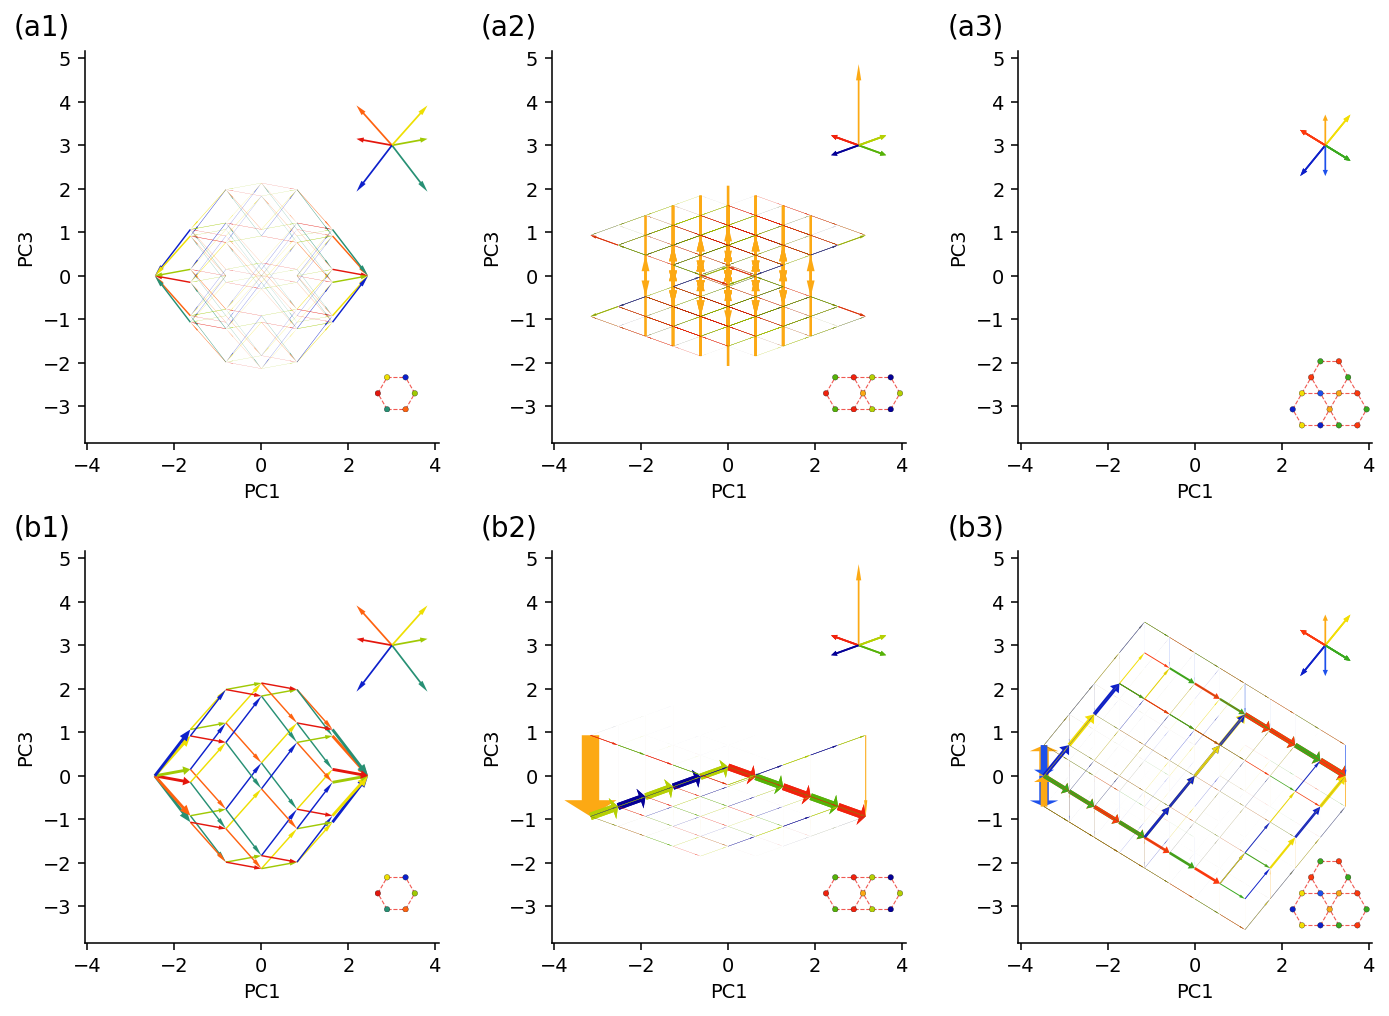

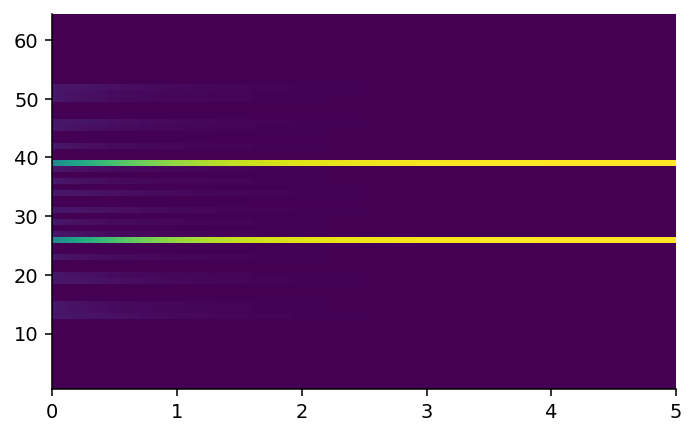

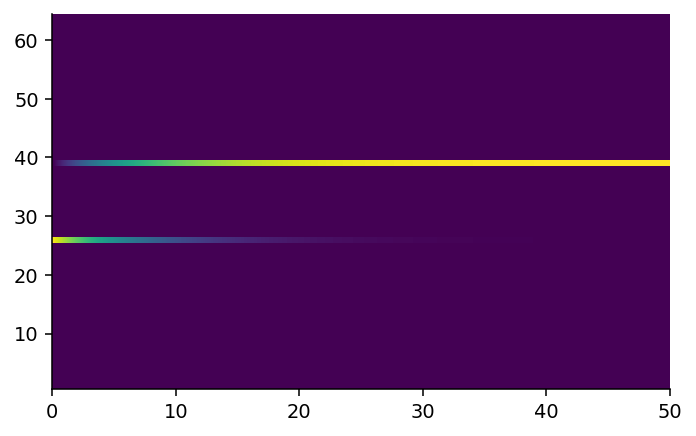

In [15]:
flip_xbasis = [True, False, False]
flip_ybasis = [False, False, False]
fig, axs = plt.subplots(2, 3, figsize=(7, 5), sharex=True, sharey=True)
fig, axs, pca = plot_flux_diagrams(10, 2*1e-3, fig, axs, 0, 2, flip_xbasis, flip_ybasis)
for i in range(2):
    for j in range(3):
        ax = axs[i, j]
        ax.xaxis.set_tick_params(which='both', labelbottom=True)
        ax.yaxis.set_tick_params(which='both', labelbottom=True)

fig.savefig("../figures/fig-s6.svg", dpi=600)
fig.savefig("../figures/fig-s6.pdf", dpi=600)

# Fig. S7

The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.


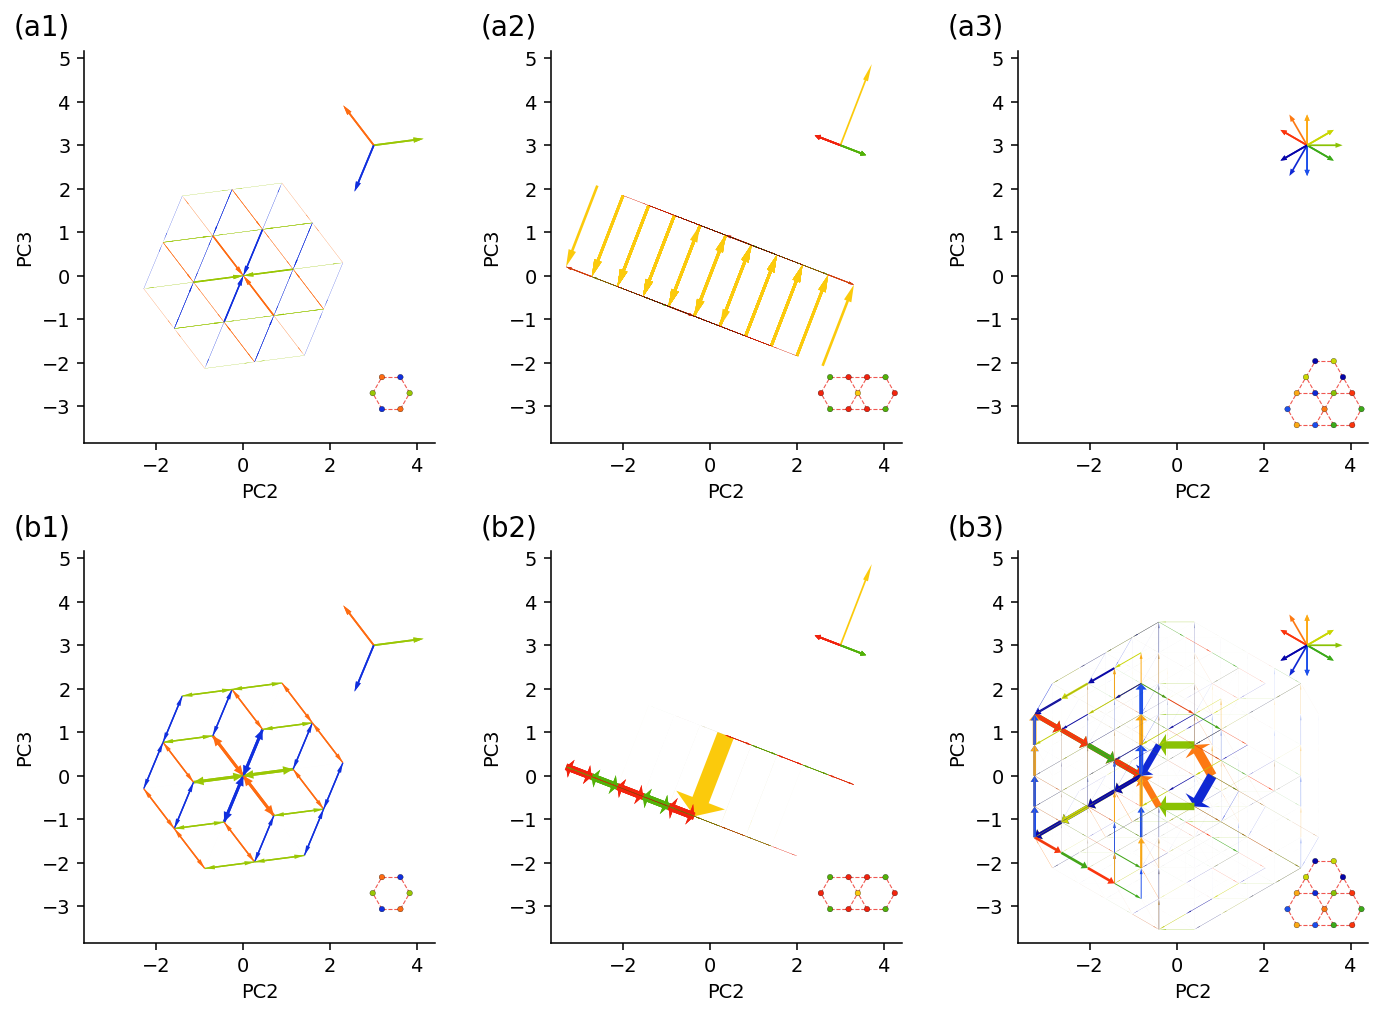

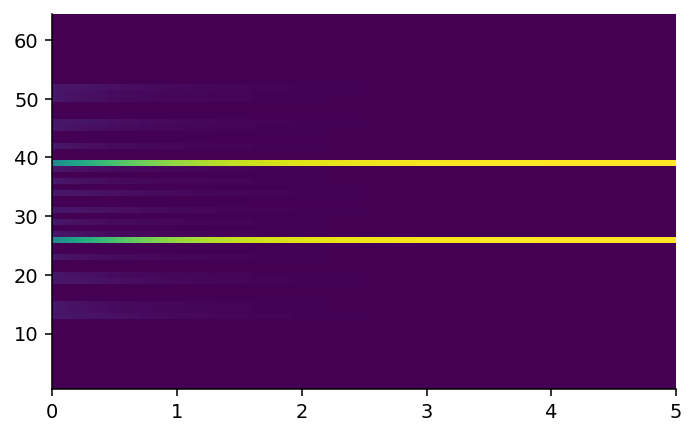

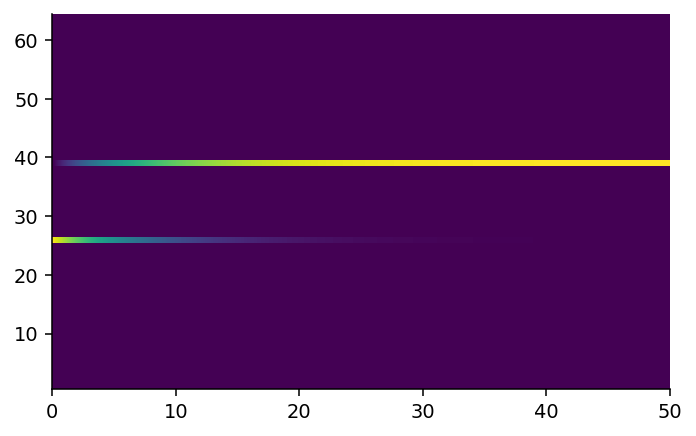

In [16]:
flip_xbasis = [True, True, True]
flip_ybasis = [False, False, False]
fig, axs = plt.subplots(2, 3, figsize=(7, 5), sharex=True, sharey=True)
fig, axs, pca = plot_flux_diagrams(10, 2*1e-3, fig, axs, 1, 2, flip_xbasis, flip_ybasis)
for i in range(2):
    for j in range(3):
        ax = axs[i, j]
        ax.xaxis.set_tick_params(which='both', labelbottom=True)
        ax.yaxis.set_tick_params(which='both', labelbottom=True)

fig.savefig("../figures/fig-s7.svg", dpi=600)
fig.savefig("../figures/fig-s7.pdf", dpi=600)

# Fig. S8

In [17]:
def plot_flux_diagrams(flux_scale, flux_threshold, fig, axs, xcomponent=0, ycomponent=1,
                       flip_xbasis=[True, False, False], flip_ybasis=[True, True, True]):
    T = 8.0
    if xcomponent == 0:
        inset_pos = [3.1, -2.7]
    elif xcomponent == 1:
        inset_pos = [3.4, -2.7]
    else :
        inset_pos = [3.4, -2.7]

    # one-ring
    ax = axs[0, 0]
    im, coord, arrow = ns.Farhan2013(1)
    energy, probability = ns.calc_energy_and_canonical_probability(im, 0.3)
    results = dn.calc_time_evolution(im, T)
    flux_edge_list = results.flux_edge_list
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[0], flip_ybasis=flip_ybasis[0],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[0]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[0]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 1.0
    inset_height = inset_width*1.0
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(a1)", fontsize=label_fontsize, transform=ax.transAxes)
    _fig, _ax = plt.subplots()
    state_index = np.arange(len(probability)) + 1
    _ax.pcolormesh(results.time, state_index, results.probability_vectors)

    # two-ring
    ax = axs[0, 1]
    im, coord, arrow = ns.Farhan2013(2)
    energy, probability = ns.calc_energy_and_canonical_probability(im, 0.3)
    #results = dn.calc_time_evolution(im, T)
    #flux_edge_list = results.flux_edge_list
    #np.savez(f"../data/flux_edge_list_2_ring_T={T:.1f}", flux_source=flux_edge_list[0], flux_target=flux_edge_list[1], flux_rate=flux_edge_list[2])
    flux_edge_list = [np.load(f"../data/flux_edge_list_2_ring_T={T:.1f}.npz")[i] for i in list(np.load(f"../data/flux_edge_list_2_ring_T={T:.1f}.npz"))]
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[1], flip_ybasis=flip_ybasis[1],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[1]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[1]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 2.0
    inset_height = inset_width*0.6
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(a2)", fontsize=label_fontsize, transform=ax.transAxes)
    #_fig, _ax = plt.subplots()
    #state_index = np.arange(len(probability)) + 1
    #_ax.pcolormesh(results.time, state_index, results.probability_vectors)

    # three-ring
    #ax = axs[0, 2]
    #im, coord, arrow = ns.Farhan2013(3)
    #energy, probability = ns.calc_energy_and_canonical_probability(im, 0.3)
    #flux_edge_list = [np.load(f"../data/flux_edge_list_3_ring_T={T:.1f}.npz")[i] for i in list(np.load(f"../data/flux_edge_list_3_ring_T={T:.1f}.npz"))]
    #fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
    #                                   xcomponent=xcomponent, ycomponent=ycomponent,
    #                                   flip_xbasis=flip_xbasis[2], flip_ybasis=flip_ybasis[2],
    #                                   basis_origin=[3, 3],
    #                                   fig=fig, ax=ax, return_pca=True)
    #eigenvector = pca.components_
    #basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    #basis = basis.T
    #if flip_xbasis[1]:
    #    basis[:, 0] = -basis[:, 0]
    #if flip_ybasis[1]:
    #    basis[:, 1] = -basis[:, 1]
    #angles = np.arctan2(basis[:, 1], basis[:, 0])
    #norm_angles = (angles + np.pi) / (2 * np.pi)
    #inset_width = 2.0
    #inset_height = inset_width*1.0
    #axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    #axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    #ax.text(-0.2, 1.04, "(a3)", fontsize=label_fontsize, transform=ax.transAxes)

    # one-ring with field
    ax = axs[1, 0]
    im, coord, arrow = ns.Farhan2013(1)
    energy, probability = ns.calc_energy_and_canonical_probability(im, 0.3)
    external_field = np.array([+1, -1, -1, +1, +1, -1])
    initial_probability_vector = np.zeros(2**len(im))
    initial_probability_vector[bin2int(((-external_field+1)/2).astype(int))] = 1.0
    results = dn.calc_time_evolution(im, T, external_field, initial_probability_vector=initial_probability_vector, final_time=50)
    flux_edge_list = results.flux_edge_list
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[0], flip_ybasis=flip_ybasis[0],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[0]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[0]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 1.0
    inset_height = inset_width*1.0
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(b1)", fontsize=label_fontsize, transform=ax.transAxes)
    _fig, _ax = plt.subplots()
    state_index = np.arange(len(probability)) + 1
    _ax.pcolormesh(results.time, state_index, results.probability_vectors)

    # two-ring with field
    ax = axs[1, 1]
    im, coord, arrow = ns.Farhan2013(2)
    energy, probability = ns.calc_energy_and_canonical_probability(im, 0.3)
    external_field = np.array([1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1])
    initial_probability_vector = np.zeros(2**len(im))
    initial_probability_vector[bin2int(((-external_field + 1)/2).astype(int))] = 1.0
    #results = dn.calc_time_evolution(im, T, external_field, initial_probability_vector=initial_probability_vector, final_time=50)
    #flux_edge_list = results.flux_edge_list
    #np.savez(f"../data/flux_edge_list_2_ring_field_T={T:.1f}", flux_source=flux_edge_list[0], flux_target=flux_edge_list[1], flux_rate=flux_edge_list[2])
    flux_edge_list = [np.load(f"../data/flux_edge_list_2_ring_T={T:.1f}_field.npz")[i] for i in list(np.load(f"../data/flux_edge_list_2_ring_T={T:.1f}_field.npz"))]
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[1], flip_ybasis=flip_ybasis[1],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[1]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[1]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 2.0
    inset_height = inset_width*0.6
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(b2)", fontsize=label_fontsize, transform=ax.transAxes)
    #_fig, _ax = plt.subplots()
    #state_index = np.arange(len(probability)) + 1
    #_ax.pcolormesh(results.time, state_index, results.probability_vectors)

    # three-ring
    ax = axs[1, 2]
    im, coord, arrow = ns.Farhan2013(3)
    energy, probability = ns.calc_energy_and_canonical_probability(im, 0.3)
    flux_edge_list = [np.load(f"../data/flux_edge_list_3_ring_T={T:.1f}_field.npz")[i] for i in list(np.load(f"../data/flux_edge_list_3_ring_T={T:.1f}_field.npz"))]
    fig, ax, pca = hc.plot_flux_on_pca(probability, flux_edge_list, flux_scale, flux_threshold,
                                       xcomponent=xcomponent, ycomponent=ycomponent,
                                       flip_xbasis=flip_xbasis[2], flip_ybasis=flip_ybasis[2],
                                       basis_origin=[3, 3],
                                       fig=fig, ax=ax, return_pca=True)
    eigenvector = pca.components_
    basis = np.vstack((eigenvector[xcomponent], eigenvector[ycomponent]))
    basis = basis.T
    if flip_xbasis[1]:
        basis[:, 0] = -basis[:, 0]
    if flip_ybasis[1]:
        basis[:, 1] = -basis[:, 1]
    angles = np.arctan2(basis[:, 1], basis[:, 0])
    norm_angles = (angles + np.pi) / (2 * np.pi)
    inset_width = 2.0
    inset_height = inset_width*1.0
    axin = ax.inset_axes([inset_pos[0]-inset_width/2, inset_pos[1]-inset_height/2, inset_width, inset_height], transform=ax.transData)
    axin = ns.plot_kagome_network(im, 1.2*coord, ax=axin, node_size=4, node_color=norm_angles, cmap=cc.cm.rainbow4, vmin=0, vmax=1, edge_width_scale=0.4)
    ax.text(-0.2, 1.04, "(b3)", fontsize=label_fontsize, transform=ax.transAxes)

    return fig, axs, pca

The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.


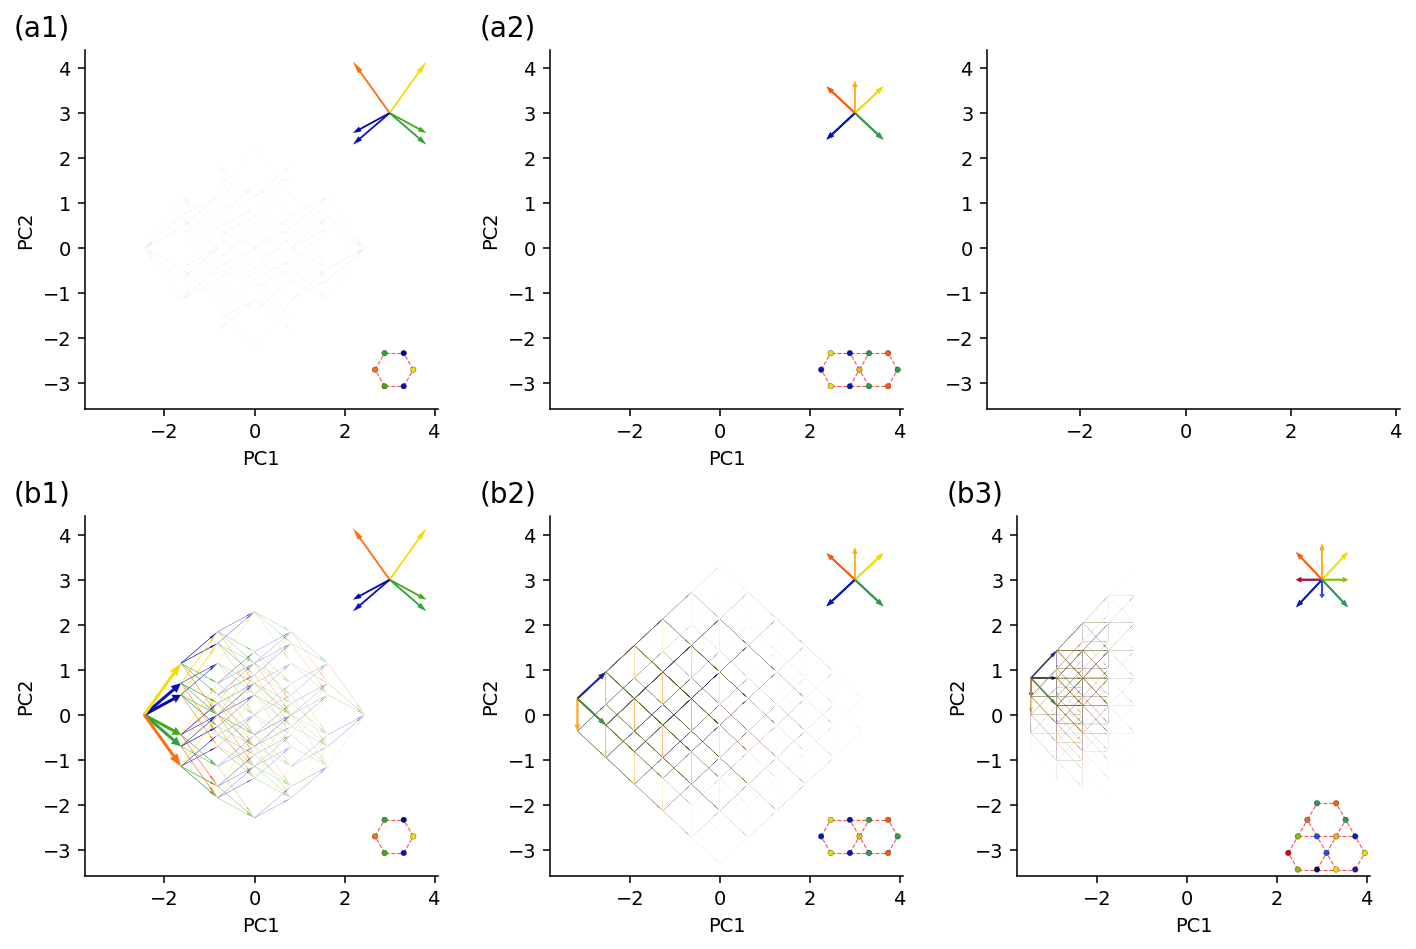

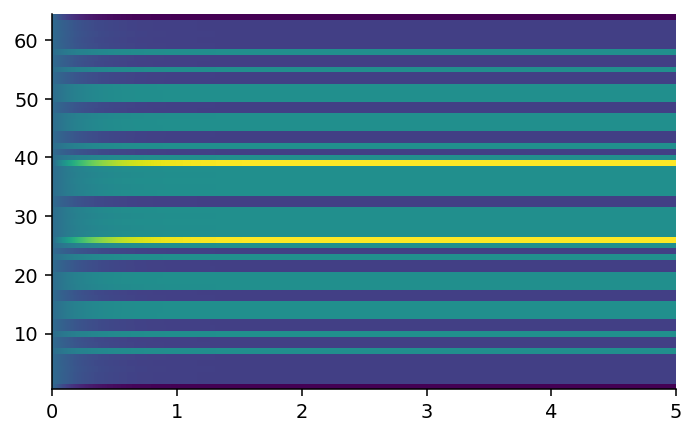

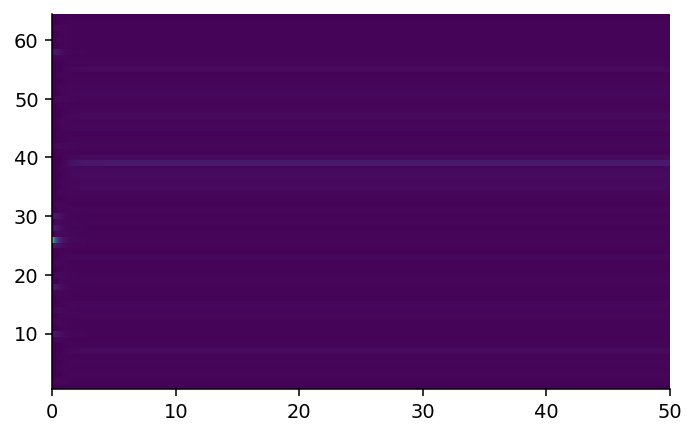

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(7, 7/3*2), sharex=True, sharey=True)
fig, axs, pca = plot_flux_diagrams(10, 2*1e-3, fig, axs)
for i in range(2):
    for j in range(3):
        ax = axs[i, j]
        ax.xaxis.set_tick_params(which='both', labelbottom=True)
        ax.yaxis.set_tick_params(which='both', labelbottom=True)

fig.savefig("../figures/fig-s8.svg")
fig.savefig("../figures/fig-s8.pdf")

# Fig. S9

In [19]:
def energy(m, J, h):
    return - J / 2 * m**2 - h * m

def entropy(m):
    return stats.entropy(np.array([(1+m)/2, (1-m)/2]))

def free_energy(m, J, h, T):
    return energy(m, J, h) - T*entropy(m)

def self_consistent_eq(m, J, h, T):
    return m - np.tanh((J*m + h)/(T+1e-8))
f = lambda x: self_consistent_eq(x, J, h, T)

def stationary_points(m, J, h, T):
    return optimize.fsolve(f, [-1.0, -h, 1.0])

m = np.linspace(-1, 1, 1001)
J = 1
Ts = np.array([0.0, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4])

/tmp/ipykernel_187003/714186889.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  return optimize.fsolve(f, [-1.0, -h, 1.0])
/tmp/ipykernel_187003/714186889.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  return optimize.fsolve(f, [-1.0, -h, 1.0])


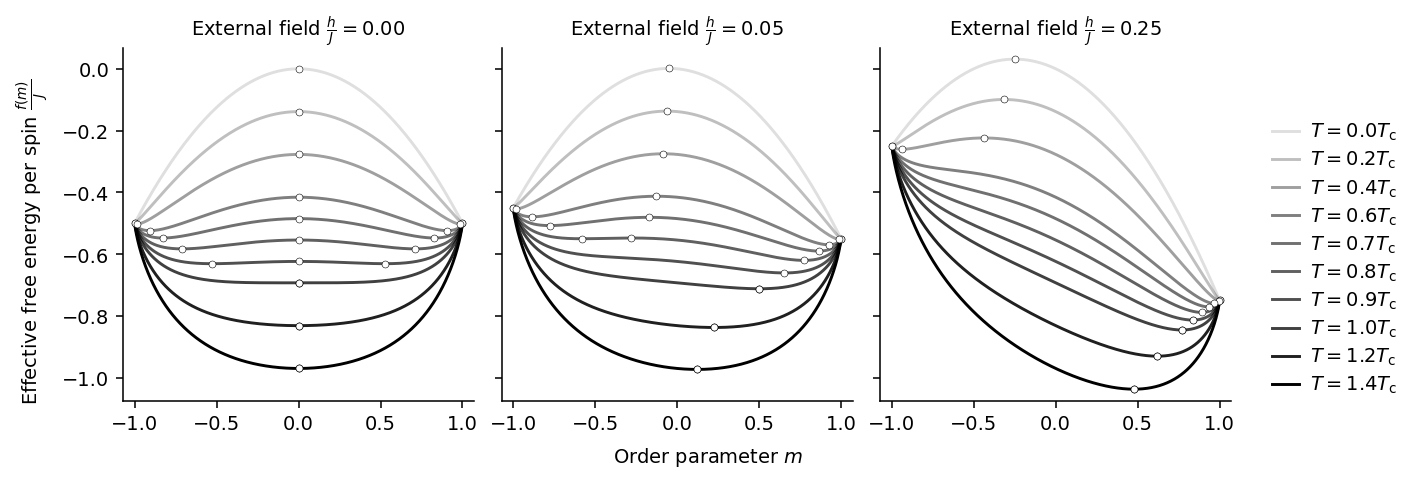

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(7, 7/3), sharex=True, sharey=True)
fig.supxlabel(r"Order parameter $m$")
fig.supylabel(r"Effective free energy per spin $\frac{f\left(m\right)}{J}$")

h = 0.0
ax = axs[0]
for T in Ts:
    ax.plot(m, free_energy(m, J, h, T), alpha=(T+0.2)/(Ts[-1]+0.2), c='k', label=rf"$T={T:.1f}T_\mathrm{{c}}$", zorder=0)
    spoints = stationary_points(m, J, h, T)
    spoints = spoints[np.abs(f(spoints)) < 0.001]
    ax.plot(spoints, free_energy(spoints, J, h, T), lw=0, c='w', marker='o', ms=2.5, mew=0.2, mec='k')
ax.set_title(rf"External field $\frac{{h}}{{J}}={h:.2f}$")

h = 0.05
ax = axs[1]
for T in Ts:
    ax.plot(m, free_energy(m, J, h, T), alpha=(T+0.2)/(Ts[-1]+0.2), c='k', label=rf"$T={T:.1f}T_\mathrm{{c}}$", zorder=0)
    spoints = stationary_points(m, J, h, T)
    spoints = spoints[np.abs(f(spoints)) < 0.001]
    ax.plot(spoints, free_energy(spoints, J, h, T), lw=0, c='w', marker='o', ms=2.5, mew=0.2, mec='k')
ax.set_title(rf"External field $\frac{{h}}{{J}}={h:.2f}$")

h = 0.25
ax = axs[2]
for T in Ts[:]:
    ax.plot(m, free_energy(m, J, h, T), alpha=(T+0.2)/(Ts[-1]+0.2), c='k', label=rf"$T={T:.1f}T_\mathrm{{c}}$", zorder=0)
    spoints = stationary_points(m, J, h, T)
    spoints = spoints[np.abs(f(spoints)) < 0.001]
    ax.plot(spoints, free_energy(spoints, J, h, T), lw=0, c='w', marker='o', ms=2.5, mew=0.2, mec='k')
ax.set_title(rf"External field $\frac{{h}}{{J}}={h:.2f}$")
ax.legend(loc=[1.1, 0.0])

fig.savefig("../figures/fig-s9.svg", dpi=600)
fig.savefig("../figures/fig-s9.pdf", dpi=600)